In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Question 1

In an edge detection algorithm, one common approach is to initially perform Gaussian smoothing on the image and subsequently apply the Laplacian filter. If we reverse this order and first apply the Laplacian filter followed by Gaussian smoothing, what distinctions emerge between the two approaches?
(Ensure that the reason behind the fact is explained, and include code-based calculation and results display for Lena image.)

## Answer 1

1. Gaussian Smoothing followed by Laplacian Filter:
   - In this approach, you start by applying a Gaussian filter to the image. The Gaussian filter smoothens the image and reduces noise, which helps in getting a smoother representation of the image.
   - After the Gaussian smoothing, you apply the Laplacian filter. The Laplacian filter enhances high-frequency components in the image, which correspond to edges and abrupt changes in intensity.
   - This approach is commonly known as the LoG (Laplacian of Gaussian) operator or the Marr-Hildreth edge detection method. It's effective at detecting edges and can also highlight edges at different scales by using different levels of Gaussian smoothing.

2. Laplacian Filter followed by Gaussian Smoothing:
   - In this approach, you apply the Laplacian filter first, enhancing edges and high-frequency components in the original image.
   - After the Laplacian filter, you apply Gaussian smoothing. This will then blur the already enhanced edges, making them less pronounced.
   - The result of this approach is typically a smoothed image with reduced edge information.


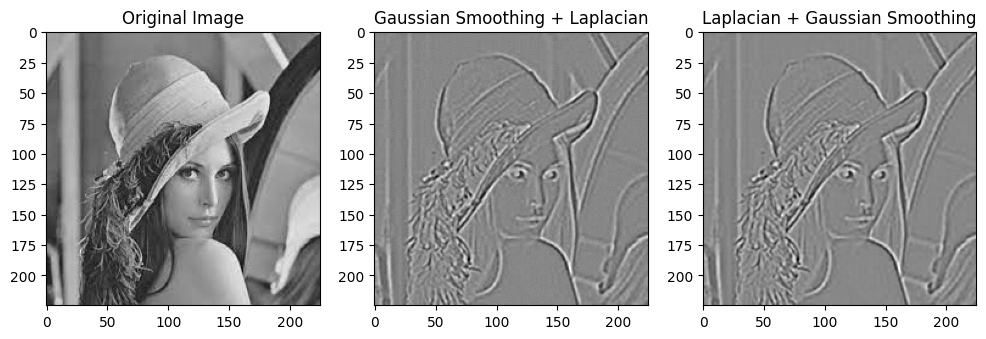

In [3]:
# Load the Lena image
lena = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)

# Gaussian Smoothing followed by Laplacian Filter
gaussian_laplacian = cv2.Laplacian(cv2.GaussianBlur(lena, (5, 5), 0), cv2.CV_64F)

# Laplacian Filter followed by Gaussian Smoothing
laplacian_gaussian = cv2.GaussianBlur(cv2.Laplacian(lena, cv2.CV_64F), (5, 5), 0)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(lena, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(gaussian_laplacian, cmap='gray'), plt.title('Gaussian Smoothing + Laplacian')
plt.subplot(133), plt.imshow(laplacian_gaussian, cmap='gray'), plt.title('Laplacian + Gaussian Smoothing')

plt.show()

# Question 2
What are the key distinctions between applying the first derivative test vertically and horizontally, and in what situations would you choose one over the other for specific use cases?

## Answer 2

The key distinctions between applying the first derivative test (often using gradient operators like Sobel or Prewitt) vertically and horizontally lie in the directions of the edges detected and the specific use cases for which you might choose one over the other:

1. Vertical First Derivative (Edge Detection in the Vertical Direction):
   - Vertical edge detection emphasizes changes in intensity values in the vertical direction (up and down) within an image.
   - It highlights vertical edges, such as those in objects standing upright or in images where the primary features of interest are oriented vertically. For example, it is useful for detecting edges in buildings, trees, or text in a document.

2. Horizontal First Derivative (Edge Detection in the Horizontal Direction):
   - Horizontal edge detection emphasizes changes in intensity values in the horizontal direction (left and right) within an image.
   - It highlights horizontal edges, such as those in objects lying flat or in images where the primary features of interest are oriented horizontally. For example, it is useful for detecting edges in roads, horizons, or text lines in a document.

3. Choosing the Direction for Specific Use Cases:
   - The choice of whether to apply the first derivative test vertically or horizontally depends on the orientation and alignment of the features or edges of interest in your image.
   - If you expect the most prominent edges to be oriented vertically, use the vertical derivative to highlight these edges.
   - Conversely, if the prominent edges are horizontal, use the horizontal derivative to emphasize them.
   - In cases where both vertical and horizontal edges are important, you can apply both operators to the image and work with the resulting gradient magnitudes to identify edges in any direction.

For example, in a medical imaging context, you might apply the vertical first derivative operator to highlight blood vessels (often vertically oriented) in an X-ray image. In a scene analysis task, the horizontal first derivative operator might be more appropriate for detecting road edges in a landscape image.

In some cases, you might use both horizontal and vertical edge detection to extract features comprehensively. You can also consider using more advanced edge detection techniques like the Canny edge detector, which combines both vertical and horizontal edge information while also performing edge tracing and non-maximum suppression to produce more robust results.

# Question 3

Original Image: [ 80 110  45 150  25  70 200  95 120  30  65 175  55  40 180]
Equalized Image: [136 170  68 204  17 119 255 153 187  34 102 221  85  51 238]


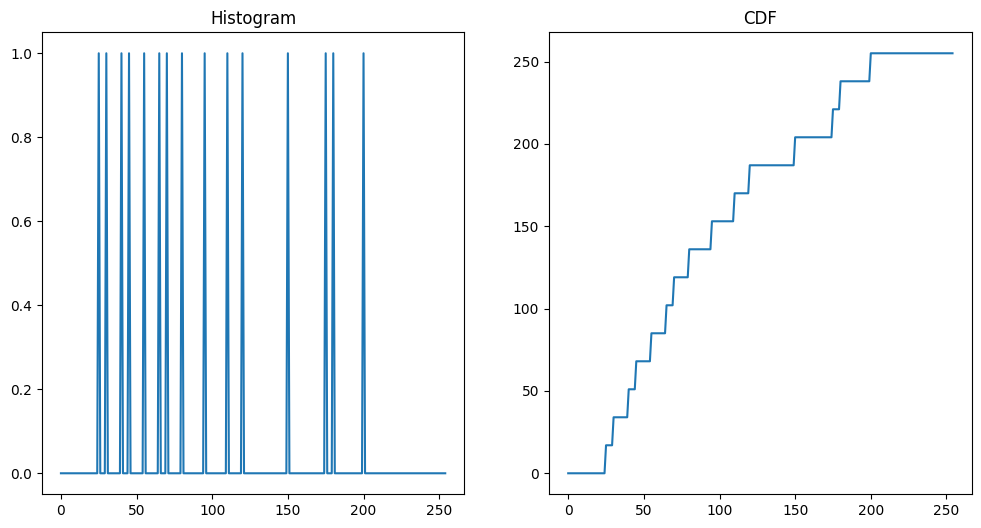

In [4]:
import numpy as np

# Define the input image
image = np.array([80, 110, 45, 150, 25, 70, 200, 95, 120, 30, 65, 175, 55, 40, 180])

# Calculate the histogram
histogram = np.histogram(image, bins=np.arange(0, 256))[0]

# Compute the cumulative distribution function (CDF)
cdf = np.cumsum(histogram)

# Normalize the CDF to map to new equalized values
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
cdf_normalized = cdf_normalized.astype('uint8')

# Apply the equalization to the image
equalized_image = cdf_normalized[image]

# Display the original and equalized images
print("Original Image:", image)
print("Equalized Image:", equalized_image)

# Plot the histogram and CDF

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.plot(histogram), plt.title('Histogram')
plt.subplot(122), plt.plot(cdf_normalized), plt.title('CDF')
plt.show()

# Question 4

Explore the utilization of wavelets in image compression and elaborate on the fundamental procedures within wavelet-based image compression, including processes like wavelet decomposition and quantization.

## Answer 4

Wavelet-based image compression is a form of lossy compression that uses wavelet transforms to decompose an image into different frequency components. The wavelet transform is a mathematical function that divides a signal into different frequency components, each representing a different scale. The wavelet transform is similar to the Fourier transform, but it is more localized in time and space. This means that it can be used to analyze signals with sharp changes in frequency or amplitude.

Wavelets are a mathematical tool used in signal processing , data analysis , and image compression. They are also used in many other fields, such as physics , engineering , and economics.
Wavelets are widely used in the computer graphics community to perform multi resolution geometric processing, they have also been used in computer vision for similar applications,
as well as for multi scale oriented filtering and denoising.

Wavelets are filters that localize a signal in both space and frequency and are defined over a hierarchy of scales.

#### Wavelet Decomposition

Wavelet decomposition is a process that breaks down a signal into its component parts. It is used to analyze signals and extract information about their frequency content. The wavelet transform is a mathematical tool that can be used to decompose a signal into different frequency components. It is similar to the Fourier transform, but it is more localized in time and space. This means that it can be used to analyze signals with sharp changes in frequency or amplitude.

#### Quantization

Quantization is a process that converts a continuous signal into a discrete signal. It is used in many applications, such as digital audio and video compression, image processing, and data compression. Quantization is the process of converting a continuous signal into a discrete signal. It is used in many applications, such as digital audio and video compression, image processing, and data compression.

# Question 5

Write a program which can, firstly, down sample an image by a factor of 2, with and without using the averaging filter, and also, up-sample the previously down sampled images by a factor of 2, using the pixel replication and bilinear interpolation methods, respectively. (Lena image)

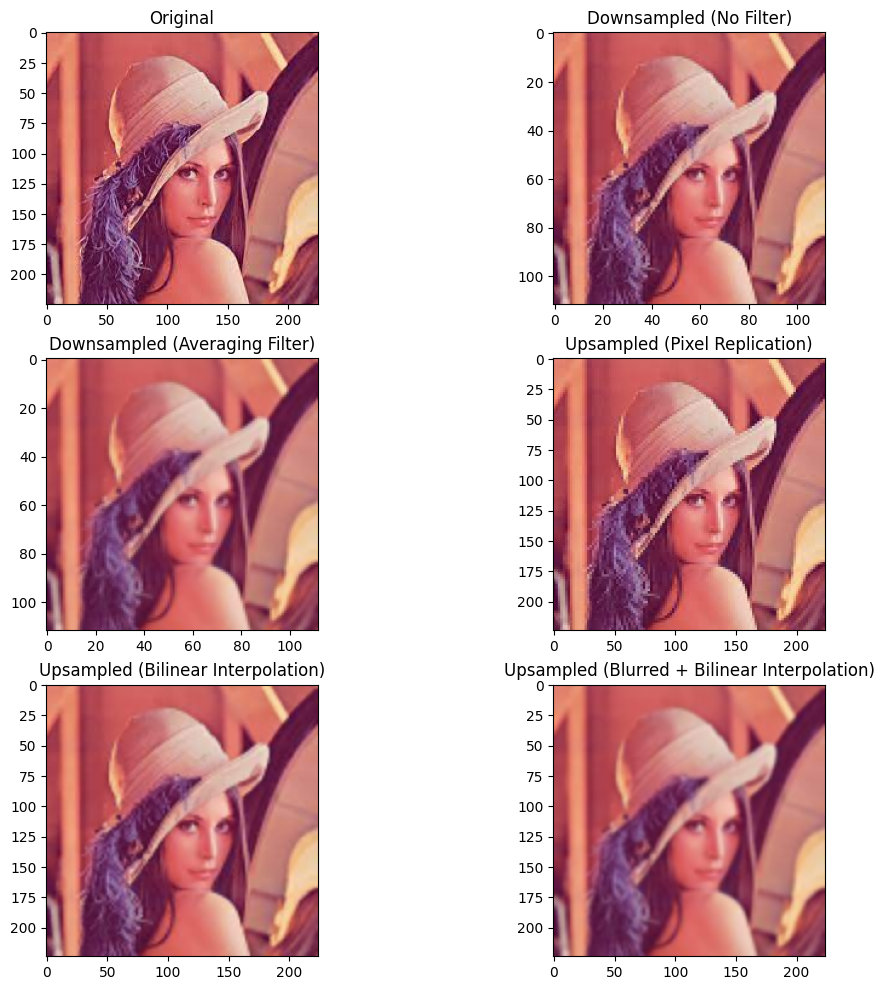

In [1]:
# Load the Lena image
lena = cv2.imread('lena.jpg')

# Downsample by a factor of 2 without averaging filter
downsampled = cv2.resize(lena, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Downsample by a factor of 2 with averaging filter
blurred = cv2.GaussianBlur(lena, (5, 5), 0)
downsampled_blurred = cv2.resize(blurred, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Upsample the downsampled images using pixel replication and bilinear interpolation
upsampled_nearest = cv2.resize(downsampled, (0, 0), fx=2, fy=2, interpolation=cv2.INTER_NEAREST)
upsampled_linear = cv2.resize(downsampled, (0, 0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
upsampled_blurred_nearest = cv2.resize(downsampled_blurred, (0, 0), fx=2, fy=2, interpolation=cv2.INTER_NEAREST)
upsampled_blurred_linear = cv2.resize(downsampled_blurred, (0, 0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

# Display the results
plt.figure(figsize=(12, 12))
plt.subplot(321), plt.imshow(lena[:,:,::-1]), plt.title('Original')
plt.subplot(322), plt.imshow(downsampled[:,:,::-1]), plt.title('Downsampled (No Filter)')
plt.subplot(323), plt.imshow(downsampled_blurred[:,:,::-1]), plt.title('Downsampled (Averaging Filter)')
plt.subplot(324), plt.imshow(upsampled_nearest[:,:,::-1]), plt.title('Upsampled (Pixel Replication)')
plt.subplot(325), plt.imshow(upsampled_linear[:,:,::-1]), plt.title('Upsampled (Bilinear Interpolation)')
plt.subplot(326), plt.imshow(upsampled_blurred_linear[:,:,::-1]), plt.title('Upsampled (Blurred + Bilinear Interpolation)')
plt.show()


# Question 6
Write a program which, Compare the outcomes of applying the specified filters in both the frequency domain and the spatial domain. (Lena image)

* A = [[1/9,1/9,1/9], [1/9,1/9,1/9], [1/9,1/9,1/9]]
* B = [[-1,-1,-1], [-1,8,-1], [-1,-1,-1]]
* C = [[0,-1,0], [-1,5,-1], [0,-1,0]]

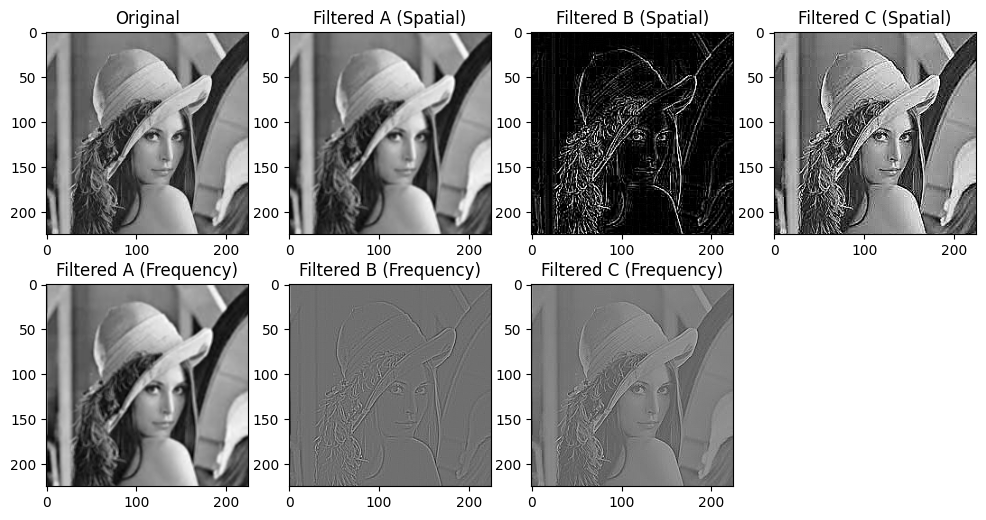

In [3]:
# Convert the image to grayscale
gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

# Define the filters
A = np.ones((3, 3)) / 9
B = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
C = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Apply the filters in the spatial domain
filtered_A = cv2.filter2D(gray, -1, A)
filtered_B = cv2.filter2D(gray, -1, B)
filtered_C = cv2.filter2D(gray, -1, C)

# Compute the 2D DFT of the image and each filter
dft_gray = np.fft.fft2(gray)
dft_A = np.fft.fft2(A, s=gray.shape)
dft_B = np.fft.fft2(B, s=gray.shape)
dft_C = np.fft.fft2(C, s=gray.shape)

# Shift the zero-frequency component to the center of the spectrum
dft_gray_shifted = np.fft.fftshift(dft_gray)
dft_A_shifted = np.fft.fftshift(dft_A)
dft_B_shifted = np.fft.fftshift(dft_B)
dft_C_shifted = np.fft.fftshift(dft_C)

# Multiply the DFT of the image by the DFT of each filter element-wise
filtered_spectrum_A = dft_gray_shifted * dft_A_shifted
filtered_spectrum_B = dft_gray_shifted * dft_B_shifted
filtered_spectrum_C = dft_gray_shifted * dft_C_shifted

# Compute the inverse 2D DFT of each filtered spectrum
filtered_A_freq = np.fft.ifft2(np.fft.ifftshift(filtered_spectrum_A)).real
filtered_B_freq = np.fft.ifft2(np.fft.ifftshift(filtered_spectrum_B)).real
filtered_C_freq = np.fft.ifft2(np.fft.ifftshift(filtered_spectrum_C)).real

# Normalize the filtered images to the range [0, 255]
filtered_A_freq_norm = cv2.normalize(filtered_A_freq, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
filtered_B_freq_norm = cv2.normalize(filtered_B_freq, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
filtered_C_freq_norm = cv2.normalize(filtered_C_freq, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Display the original and filtered images side by side
plt.figure(figsize=(12, 6))
plt.subplot(241), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(242), plt.imshow(filtered_A, cmap='gray'), plt.title('Filtered A (Spatial)')
plt.subplot(243), plt.imshow(filtered_B, cmap='gray'), plt.title('Filtered B (Spatial)')
plt.subplot(244), plt.imshow(filtered_C, cmap='gray'), plt.title('Filtered C (Spatial)')
plt.subplot(245), plt.imshow(filtered_A_freq_norm, cmap='gray'), plt.title('Filtered A (Frequency)')
plt.subplot(246), plt.imshow(filtered_B_freq_norm, cmap='gray'), plt.title('Filtered B (Frequency)')
plt.subplot(247), plt.imshow(filtered_C_freq_norm, cmap='gray'), plt.title('Filtered C (Frequency)')
plt.show()


# Question 7

For the grayscale Lena image, manually compute a 3-level approximation pyramid and corresponding prediction residual pyramid. Use 2x2 averaging for the approximation and use pixel replication for the interpolation filters.


# Answer 7

1. **Level 0: Original Image**
   - \(I_0 = \text{Original Lena Image}\)

2. **Level 1: Approximation and Residual Calculation**
   - **Approximation (\(A_1\)):**
     - Apply 2x2 averaging to \(I_0\) to obtain \(A_1\).
   - **Residual (\(R_1\)):**
     - Calculate the residual by subtracting \(A_1\) from \(I_0\).

3. **Level 2: Approximation and Residual Calculation**
   - **Approximation (\(A_2\)):**
     - Apply 2x2 averaging to \(A_1\) to obtain \(A_2\).
   - **Residual (\(R_2\)):**
     - Calculate the residual by subtracting \(A_2\) from \(A_1\).

4. **Level 3: Approximation and Residual Calculation**
   - **Approximation (\(A_3\)):**
     - Apply 2x2 averaging to \(A_2\) to obtain \(A_3\).
   - **Residual (\(R_3\)):**
     - Calculate the residual by subtracting \(A_3\) from \(A_2\).

Now, you have the approximation pyramid (\(A_0, A_1, A_2, A_3\)) and the prediction residual pyramid (\(R_1, R_2, R_3\)).


C:\Users\alast\AppData\Local\Temp\ipykernel_9780\355498035.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 3, i + 4), plt.imshow(residual_pyramid[i], cmap='gray'), plt.title(f'Residual Level {i+1}')


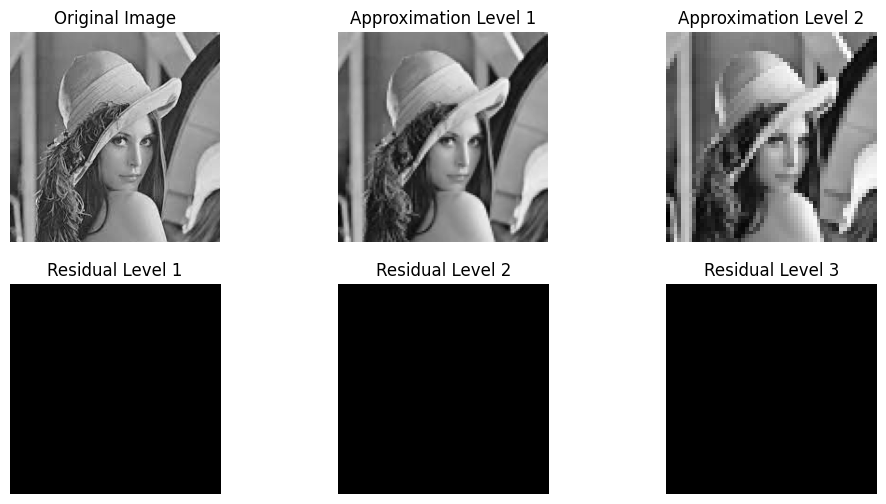

In [9]:
# Function to apply 2x2 averaging for approximation
def downsample(image):
    return cv2.resize(image, (image.shape[1] // 2, image.shape[0] // 2), interpolation=cv2.INTER_AREA)

# Function to calculate the residual between two images
def calculate_residual(original, approximation):
    return original - approximation

# Initialize the pyramids
approximation_pyramid = [lena_image]
residual_pyramid = []

# Generate the pyramids
for level in range(3):
    # Approximation
    approx_level = downsample(approximation_pyramid[-1])
    approximation_pyramid.append(approx_level)

    # Residual
    residual_level = calculate_residual(approximation_pyramid[-1], approx_level)
    residual_pyramid.append(residual_level)

# Display the original image and pyramids
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1), plt.imshow(lena_image, cmap='gray'), plt.title('Original Image')
plt.axis('off')

for i in range(3):
    plt.subplot(2, 3, i + 2), plt.imshow(approximation_pyramid[i + 1], cmap='gray'), plt.title(f'Approximation Level {i+1}')
    plt.axis('off')

for i in range(3):
    plt.subplot(2, 3, i + 4), plt.imshow(residual_pyramid[i], cmap='gray'), plt.title(f'Residual Level {i+1}')
    plt.axis('off')

plt.show()

# Question 8

For the grayscale Lena Image, compute the wavelet transform (with 3-level) using the Haar analysis filters. Comment on the differences between the pyramids generated between this one and the previous question.


# Answer 8
**Haar Wavelet Transform:**
1. **Localization of Details:**
   - Haar wavelet transform localizes details both in space and frequency. Each level captures details at different scales, allowing for better localization of features.

2. **Efficient Representation:**
   - Haar wavelet transform provides a more efficient representation of image details, making it suitable for compression applications. The coefficients obtained at each level contribute to a sparse representation of the image.

3. **Edge Detection:**
   - The Haar wavelet transform is known for its ability to detect edges and abrupt changes in the image, making it suitable for edge detection and feature extraction.

4. **Orthogonality:**
   - The Haar wavelet transform is orthogonal, meaning that the transform and its inverse do not introduce any distortion. This property can be desirable in certain applications.

**2x2 Averaging with Pixel Replication:**
1. **Spread of Details:**
   - The 2x2 averaging approach with pixel replication spreads details across the entire image. While it separates details into residuals, the spread may not be as localized as in the wavelet transform.

2. **Simplicity:**
   - The 2x2 averaging approach with pixel replication is simpler to implement and understand. It involves basic operations like averaging and pixel replication.

3. **Representation:**
   - The representation of details in the residual images may not be as compact as in the Haar wavelet transform. The details are distributed in a block-wise manner.

4. **Edge Handling:**
   - Pixel replication may introduce artifacts, especially around edges, due to the replication of pixel values. This can affect the accuracy of the residual images.

**Summary:**
- The Haar wavelet transform provides a more sophisticated and efficient way of representing image details, especially in terms of compression and edge detection.
- The manually computed approximation and residual pyramids using 2x2 averaging with pixel replication are simpler but may not capture details as efficiently or precisely.


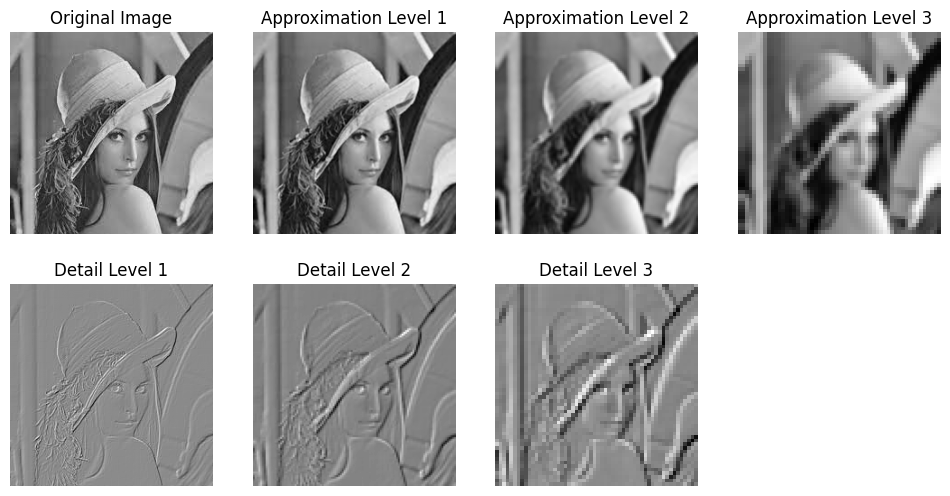

In [5]:
# Function to apply Haar wavelet transform
def haar_wavelet_transform(image, num_levels):
    coeffs = []
    for _ in range(num_levels):
        # Low-pass filtering (approximation)
        approx = cv2.boxFilter(image, -1, (2, 2))
        
        # High-pass filtering (detail/wavelet)
        wavelet = image - approx
        
        # Save coefficients
        coeffs.append((approx, wavelet))
        
        # Downsample the approximation for the next level
        image = cv2.resize(approx, (approx.shape[1] // 2, approx.shape[0] // 2), interpolation=cv2.INTER_AREA)
    
    # Save the final approximation at the last level
    coeffs.append((approx,))
    
    return coeffs

# Compute Haar wavelet transform with 3 levels
wavelet_coeffs = haar_wavelet_transform(lena_image.astype(np.float32), num_levels=3)

# Display the original image and wavelet coefficients
plt.figure(figsize=(12, 6))
plt.subplot(2, 4, 1), plt.imshow(lena_image, cmap='gray'), plt.title('Original Image')
plt.axis('off')

# Display the wavelet coefficients
for level in range(3):
    plt.subplot(2, 4, level + 2), plt.imshow(wavelet_coeffs[level][0], cmap='gray'), plt.title(f'Approximation Level {level+1}')
    plt.axis('off')
    
    plt.subplot(2, 4, level + 5), plt.imshow(wavelet_coeffs[level][1], cmap='gray'), plt.title(f'Detail Level {level+1}')
    plt.axis('off')

plt.show()

# Question 9

Implement the scaling transform using Bilinear Interpolation and Nearest-Neighbor Interpolation and compare the given results. (Lena image)

# Answer 9

The comparison of the given results involves evaluating the visual quality and characteristics of the Lena image after scaling using Bilinear Interpolation and Nearest-Neighbor Interpolation. Here are some aspects to consider:

1. **Image Quality:**
   - **Bilinear Interpolation:** Provides a smoother and visually more appealing result. It takes weighted averages of the surrounding pixels, resulting in a continuous and interpolated image.
   - **Nearest-Neighbor Interpolation:** Can produce blocky and pixelated results. It assigns the value of the nearest neighbor pixel to each pixel in the scaled image, which may result in a less smooth appearance.

2. **Edge Handling:**
   - **Bilinear Interpolation:** Handles edges more smoothly and avoids the blocky appearance around high-contrast regions.
   - **Nearest-Neighbor Interpolation:** May introduce artifacts and blockiness, especially along edges, due to the pixel replication approach.

3. **Computational Cost:**
   - **Bilinear Interpolation:** Generally involves more complex calculations, as it considers weighted averages of multiple pixels.
   - **Nearest-Neighbor Interpolation:** Requires less computation since it simply assigns the value of the nearest pixel.

4. **Interpolation Characteristics:**
   - **Bilinear Interpolation:** Interpolates values based on a linear model, which provides a continuous and differentiable result.
   - **Nearest-Neighbor Interpolation:** Uses the value of the nearest pixel directly, resulting in a piecewise-constant representation.

5. **Artifacting:**
   - **Bilinear Interpolation:** Tends to produce smoother results, but may still exhibit some blurring, especially when upscaling significantly.
   - **Nearest-Neighbor Interpolation:** More prone to blocky artifacts, particularly noticeable when upscaling.


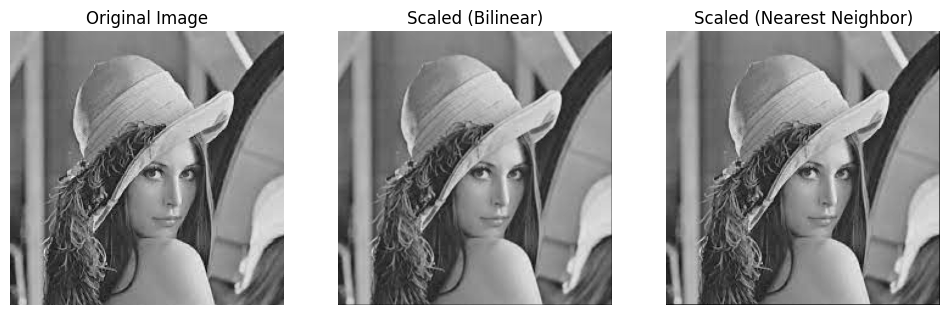

In [4]:
# Load the Lena image
lena_image = cv2.imread("lena.jpg", cv2.IMREAD_GRAYSCALE)

# Function for scaling using Bilinear Interpolation
def scale_bilinear(image, scale_factor):
    height, width = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    
    # Create an affine matrix for scaling
    M = np.array([[scale_factor, 0, 0],
                  [0, scale_factor, 0]], dtype=np.float32)

    # Apply the affine transformation using warpAffine
    scaled_image = cv2.warpAffine(image, M, (new_width, new_height), flags=cv2.INTER_LINEAR)

    return scaled_image

# Function for scaling using Nearest-Neighbor Interpolation
def scale_nearest_neighbor(image, scale_factor):
    height, width = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Create an affine matrix for scaling
    M = np.array([[scale_factor, 0, 0],
                  [0, scale_factor, 0]], dtype=np.float32)

    # Apply the affine transformation using warpAffine
    scaled_image = cv2.warpAffine(image, M, (new_width, new_height), flags=cv2.INTER_NEAREST)

    return scaled_image

# Scale Lena image using Bilinear Interpolation
lena_scaled_bilinear = scale_bilinear(lena_image, scale_factor=2.0)

# Scale Lena image using Nearest-Neighbor Interpolation
lena_scaled_nearest_neighbor = scale_nearest_neighbor(lena_image, scale_factor=2.0)

# Display the original and scaled images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1), plt.imshow(lena_image, cmap='gray'), plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2), plt.imshow(lena_scaled_bilinear, cmap='gray'), plt.title('Scaled (Bilinear)')
plt.axis('off')

plt.subplot(1, 3, 3), plt.imshow(lena_scaled_nearest_neighbor, cmap='gray'), plt.title('Scaled (Nearest Neighbor)')
plt.axis('off')

plt.show()
